<a href="https://colab.research.google.com/github/samuelaojih/Google-Colab/blob/main/Population_Growth_Rate_for_Jos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import ee
import geemap as gee



In [4]:
ee.Authenticate()
ee.Initialize(project = 'ee-samuelojihcool')

In [5]:
cor = [[8.745118789723874,9.690682459589],\
[9.006044082692624,9.690682459589],\
[9.006044082692624,10.018115071797768],\
[8.745118789723874,10.018115071797768],\
[8.745118789723874,9.690682459589]]

In [6]:
cor

[[8.745118789723874, 9.690682459589],
 [9.006044082692624, 9.690682459589],
 [9.006044082692624, 10.018115071797768],
 [8.745118789723874, 10.018115071797768],
 [8.745118789723874, 9.690682459589]]

In [7]:
roi = ee.Geometry.Polygon(cor)
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              8.745118789723874,
              9.690682459589
            ],
            [
              9.006044082692624,
              9.690682459589
            ],
            [
              9.006044082692624,
              10.018115071797768
            ],
            [
              8.745118789723874,
              10.018115071797768
            ],
            [
              8.745118789723874,
              9.690682459589
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [8]:
map = gee.Map(basemap = 'SATELLITE')
map.centerObject(roi)
map.addLayer(roi,{},'roi')
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# New Section

In [9]:
pop = ee.ImageCollection("JRC/GHSL/P2023A/GHS_POP")
pop

In [10]:
pop_stack = pop.toBands().clip(roi)
pop_stack

In [11]:
map.addLayer(pop_stack,{},'pop_stack')

In [12]:
def pop_count(img):
  pop_sum = img.reduceRegion(reducer = ee.Reducer.sum(), geometry = roi, scale = 100).values().get(0)
  date = img.date().format('YYYY-MM-dd')
  return ee.Feature(None, {'date': date, 'pop': pop_sum})

In [13]:
pop_val = pop.map(pop_count)
pop_val

In [14]:
feature_list = pop_val.toList(pop_val.size()).getInfo()
feature_list

[{'type': 'Feature',
  'geometry': None,
  'id': '1975',
  'properties': {'date': '1975-01-01', 'pop': 323369.7227254753}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1980',
  'properties': {'date': '1980-01-01', 'pop': 422770.6739056271}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1985',
  'properties': {'date': '1985-01-01', 'pop': 521959.1155459053}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1990',
  'properties': {'date': '1990-01-01', 'pop': 583742.7204250898}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1995',
  'properties': {'date': '1995-01-01', 'pop': 653868.7919584361}},
 {'type': 'Feature',
  'geometry': None,
  'id': '2000',
  'properties': {'date': '2000-01-01', 'pop': 732004.50128839}},
 {'type': 'Feature',
  'geometry': None,
  'id': '2005',
  'properties': {'date': '2005-01-01', 'pop': 825523.8105267816}},
 {'type': 'Feature',
  'geometry': None,
  'id': '2010',
  'properties': {'date': '2010-01-01', 'pop': 920605.0368402412}},
 {'type': 

In [15]:
date = [items['properties']['date'] for items in feature_list]
date

['1975-01-01',
 '1980-01-01',
 '1985-01-01',
 '1990-01-01',
 '1995-01-01',
 '2000-01-01',
 '2005-01-01',
 '2010-01-01',
 '2015-01-01',
 '2020-01-01',
 '2025-01-01',
 '2030-01-01']

In [16]:
pop_sum = [items['properties']['pop'] for items in feature_list]
pop_sum

[323369.7227254753,
 422770.6739056271,
 521959.1155459053,
 583742.7204250898,
 653868.7919584361,
 732004.50128839,
 825523.8105267816,
 920605.0368402412,
 1022212.6733197577,
 1134771.032894575,
 1282832.6503258639,
 1479884.7744775242]

In [17]:
import numpy as np
import pandas as pd

In [18]:
df = pd.DataFrame({'date': date, 'pop': pop_sum})
df['date'] = pd.to_datetime(df['date'])
df_index = df.set_index('date').round(0)
df_index

,pop
date,
1975-01-01,323370.0
1980-01-01,422771.0
1985-01-01,521959.0
1990-01-01,583743.0
1995-01-01,653869.0
2000-01-01,732005.0
2005-01-01,825524.0
2010-01-01,920605.0
2015-01-01,1022213.0


In [19]:
df_index.to_csv('jos_pop.csv')

In [21]:
"""pop_growth_rate = log(current/previous)/interval

pop_change_rate = ((current - previous) / previous ) * 100
"""

'pop_growth_rate = log(current/previous)/interval\n\npop_change_rate = ((current - previous) / previous ) * 100\n'

In [22]:
current = df_index.copy()
previous = df_index.shift(1)
previous

,pop
date,
1975-01-01,NaN
1980-01-01,323370.0
1985-01-01,422771.0
1990-01-01,521959.0
1995-01-01,583743.0
2000-01-01,653869.0
2005-01-01,732005.0
2010-01-01,825524.0
2015-01-01,920605.0


In [23]:
df_index['change'] = ((current - previous) / previous) * 100.0
df_index

,pop,change
date,,
1975-01-01,323370.0,NaN
1980-01-01,422771.0,30.739091
1985-01-01,521959.0,23.461401
1990-01-01,583743.0,11.836945
1995-01-01,653869.0,12.013163
2000-01-01,732005.0,11.949794
2005-01-01,825524.0,12.775732
2010-01-01,920605.0,11.517654
2015-01-01,1022213.0,11.037090


In [24]:
df_index['growth_rate'] = np.log(current / previous) / 5.0
df_index

,pop,change,growth_rate
date,,,
1975-01-01,323370.0,NaN,NaN
1980-01-01,422771.0,30.739091,0.053607
1985-01-01,521959.0,23.461401,0.042152
1990-01-01,583743.0,11.836945,0.022374
1995-01-01,653869.0,12.013163,0.022689
2000-01-01,732005.0,11.949794,0.022576
2005-01-01,825524.0,12.775732,0.024046
2010-01-01,920605.0,11.517654,0.021803
2015-01-01,1022213.0,11.037090,0.020939


<Axes: xlabel='date'>

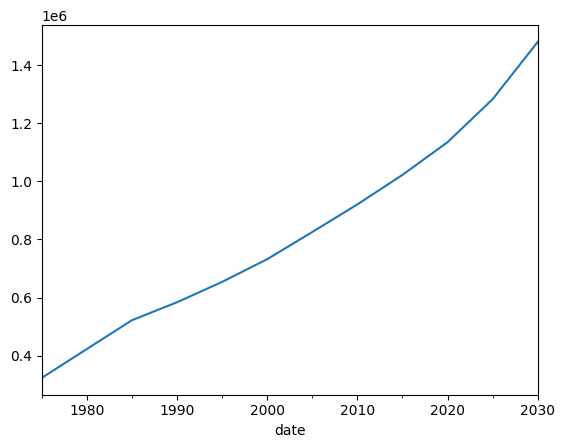

In [25]:
df_index['pop'].plot()

<Axes: xlabel='date'>

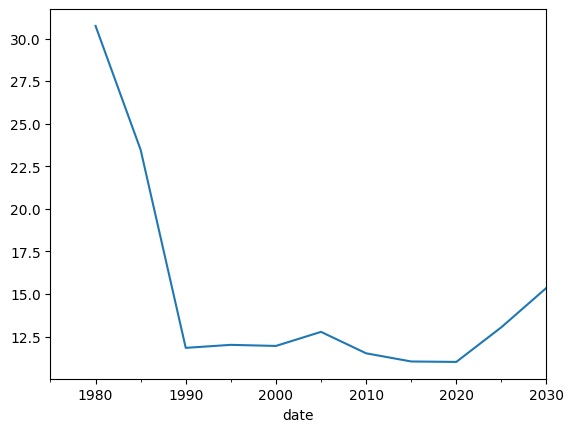

In [26]:
df_index['change'].plot()

<Axes: xlabel='date'>

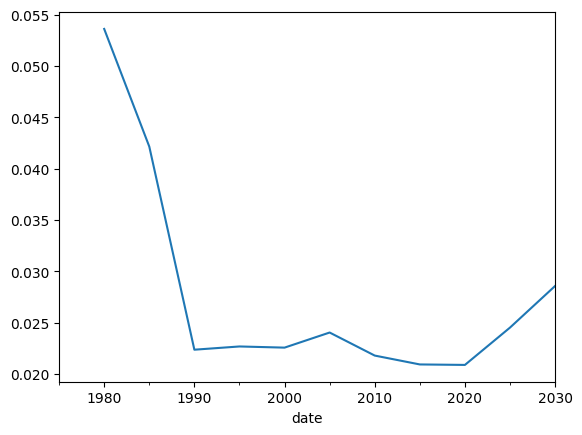

In [27]:
df_index['growth_rate'].plot()